In [23]:
#goal: visualize photozdaata


import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
#import data set
import numpy as np
mnist = tf.keras.datasets.mnist
import random
from tensorboard.plugins.hparams import api as hp
import datetime
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import seaborn as sns

#import photoz data:
tfd = tfp.distributions
#from google.colab import files


photozdata = pd.read_csv('/data/HSC_v2/HSC_photozdata_with_spectra.csv')
spectro_z = np.asarray(photozdata["specz_redshift"])

col1 = np.asarray(photozdata["g_cmodel_mag"])
col2 = np.asarray(photozdata["r_cmodel_mag"])
col3 = np.asarray(photozdata["i_cmodel_mag"])
col4 =np.asarray(photozdata["z_cmodel_mag"])
col5 = np.asarray(photozdata["y_cmodel_mag"])


#photodata = np.column_stack((col1,col2,col3,col4,col5))

photodata = {'g_mag':col1,
             'r_mag':col2,
             'i_mag':col3,
             'z_mag':col4,
             'y_mag':col5,
             'zspec':spectro_z}

df = pd.DataFrame(photodata)
photozdata = df

spectro_z = pd.DataFrame(spectro_z)

photozdata.replace(-99., np.nan, inplace=True)
photozdata.replace(-99.9, np.nan, inplace=True)

photozdata.replace(np.inf, np.nan, inplace=True)
#photozdata.replace(-99.9, np.nan, inplace=True)

photozdata.dropna(inplace=True)

photozdata.describe()


#print(len(col1))

,g_mag,r_mag,i_mag,z_mag,y_mag,zspec
count,127650.000000,127650.000000,127650.000000,127650.000000,127650.000000,127650.000000
mean,23.065041,22.251509,21.634528,21.301561,21.128832,0.882826
std,1.325222,1.268008,1.255325,1.262554,1.279783,0.831809
min,16.207699,15.334381,14.787071,14.448893,14.223459,0.000001
25%,22.314024,21.594710,21.041088,20.713881,20.518530,0.521600
50%,23.162751,22.401020,21.773480,21.430656,21.261357,0.730940
75%,23.929920,23.050636,22.330424,21.981963,21.825729,0.978040
max,25.999767,27.396523,27.057146,27.920784,34.435986,9.999000


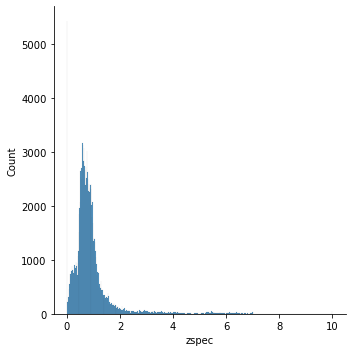

In [17]:
ax = sns.displot(photozdata.zspec)

Text(0.5, 0, 'Brightness (mag)')

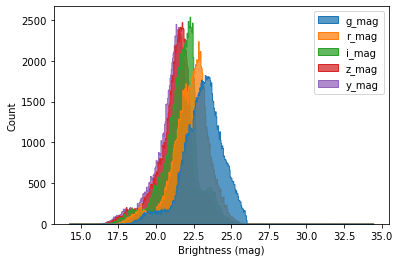

In [18]:
#Let's also look at the distribution of the brightnesses in the different bands
ax = sns.histplot(photozdata.iloc[:,0:-1], element="step")
ax.set_xlabel('Brightness (mag)')

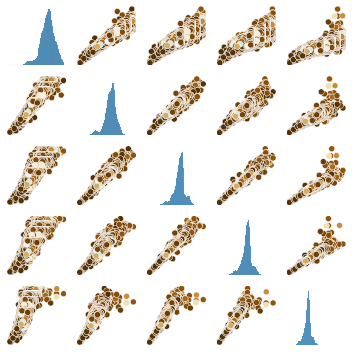

In [19]:
#Let's examine how correlated the features are to one another
train_df = photozdata.iloc[:,0:-1]
target_df = photozdata.zspec
num_features = len(train_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(5,5))
for ii,i in enumerate(train_df.columns):
    for jj,j in enumerate(train_df.columns):
        if i==j:    # diagonal
            sns.histplot(train_df[i], kde=False, ax=ax[ii][jj])
            ax[ii][jj].axis('off')
        else:       # off diagonal
            sns.scatterplot(x=train_df[i],y=train_df[j], 
                            ax=ax[ii][jj], hue=target_df, palette='BrBG',
                            legend=False)
            ax[ii][jj].axis('off')
fig.tight_layout()

In [20]:
#goal: visualize photozdaata


import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
#import data set
import numpy as np
mnist = tf.keras.datasets.mnist
import random
from tensorboard.plugins.hparams import api as hp
import datetime
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import seaborn as sns

#import photoz data:
tfd = tfp.distributions
#from google.colab import files


photozdata = pd.read_csv('/data/HSC/HSC_IMAGES_FIXED/HSC_trimmed_photozdata_v2.csv')
spectro_z = np.asarray(photozdata["specz_redshift"])

col1 = np.asarray(photozdata["g_cmodel_mag"])
col2 = np.asarray(photozdata["r_cmodel_mag"])
col3 = np.asarray(photozdata["i_cmodel_mag"])
col4 =np.asarray(photozdata["z_cmodel_mag"])
col5 = np.asarray(photozdata["y_cmodel_mag"])


#photodata = np.column_stack((col1,col2,col3,col4,col5))

photodata = {'g_mag':col1,
             'r_mag':col2,
             'i_mag':col3,
             'z_mag':col4,
             'y_mag':col5,
             'zspec':spectro_z}

df = pd.DataFrame(photodata)
photozdata = df

spectro_z = pd.DataFrame(spectro_z)

photozdata.describe()

,g_mag,r_mag,i_mag,z_mag,y_mag,zspec
count,44463.000000,44463.000000,44463.000000,44463.000000,44463.000000,44463.000000
mean,23.302233,22.417882,21.730843,21.357059,21.164748,0.834886
std,1.281531,1.259458,1.267330,1.277166,1.293109,0.707409
min,16.535921,15.585190,15.075962,14.731529,14.492533,0.000004
25%,22.669373,21.852334,21.156275,20.767403,20.554604,0.543370
50%,23.361560,22.587831,21.907429,21.503090,21.309319,0.728400
75%,24.065055,23.155718,22.397078,22.037994,21.869746,0.938700
max,34.930744,27.396523,27.189955,27.018696,29.832030,9.999000


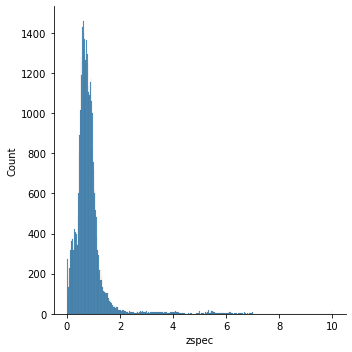

In [2]:
ax = sns.displot(photozdata.zspec)

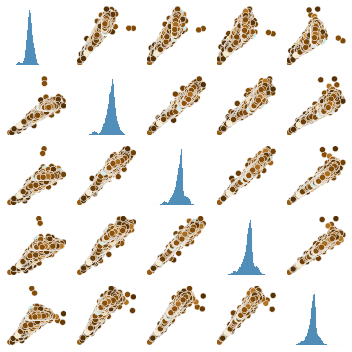

In [3]:
#Let's examine how correlated the features are to one another
train_df = photozdata.iloc[:,0:-1]
target_df = photozdata.zspec
num_features = len(train_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(5,5))
for ii,i in enumerate(train_df.columns):
    for jj,j in enumerate(train_df.columns):
        if i==j:    # diagonal
            sns.histplot(train_df[i], kde=False, ax=ax[ii][jj])
            ax[ii][jj].axis('off')
        else:       # off diagonal
            sns.scatterplot(x=train_df[i],y=train_df[j], 
                            ax=ax[ii][jj], hue=target_df, palette='BrBG',
                            legend=False)
            ax[ii][jj].axis('off')
fig.tight_layout()

Text(0.5, 0, 'Brightness (mag)')

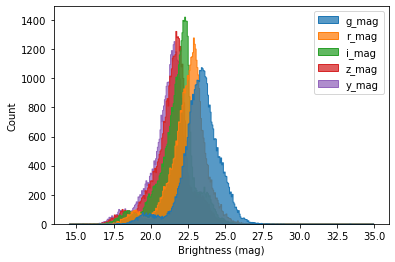

In [21]:
#Let's also look at the distribution of the brightnesses in the different bands
ax = sns.histplot(photozdata.iloc[:,0:-1], element="step")
ax.set_xlabel('Brightness (mag)')

In [9]:
photozdata = pd.read_csv('/data/HSC/HSC_IMAGES_FIXED/HSC_trimmed_photozdata_v2.csv')
spectro_z = np.asarray(photozdata["specz_redshift"])

col1 = np.asarray(photozdata["g_cmodel_mag"])
col2 = np.asarray(photozdata["r_cmodel_mag"])
col3 = np.asarray(photozdata["i_cmodel_mag"])
col4 =np.asarray(photozdata["z_cmodel_mag"])
col5 = np.asarray(photozdata["y_cmodel_mag"])


#photodata = np.column_stack((col1,col2,col3,col4,col5))

photodata = {'g_mag':col1,
             'r_mag':col2,
             'i_mag':col3,
             'z_mag':col4,
             'y_mag':col5,
             'zspec':spectro_z}

df = pd.DataFrame(photodata)
photozdata = df

spectro_z = pd.DataFrame(spectro_z)

photozdata.describe()



,g_mag,r_mag,i_mag,z_mag,y_mag,zspec
count,44463.000000,44463.000000,44463.000000,44463.000000,44463.000000,44463.000000
mean,23.302233,22.417882,21.730843,21.357059,21.164748,0.834886
std,1.281531,1.259458,1.267330,1.277166,1.293109,0.707409
min,16.535921,15.585190,15.075962,14.731529,14.492533,0.000004
25%,22.669373,21.852334,21.156275,20.767403,20.554604,0.543370
50%,23.361560,22.587831,21.907429,21.503090,21.309319,0.728400
75%,24.065055,23.155718,22.397078,22.037994,21.869746,0.938700
max,34.930744,27.396523,27.189955,27.018696,29.832030,9.999000
